## Bi-directional LSTM from Milestone 2

The bi-directional LSTM had the highest performance in milestone 2 and we will try to improve this model in milestone 3.

In [ ]:
%load_ext autoreload
%autoreload 2
%cd ../

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/godlinn/Documents/Studium/WS2022/NLP


In [ ]:
import torch
from tuwnlpie.milestone2.model import LSTM
from scripts.evaluate import evaluate_lstm
from scripts.train import train_lstm
from tuwnlpie.milestone2.utils import load_metrics, create_loss_plot, get_loaders_lstm, prepare_dataset_lstm
import spacy
torch.manual_seed(1234)

In [ ]:
# run this to prepare dataset for training with lstm and create train, valid and test csv files in data
prepare_dataset_lstm()

In [ ]:
# loaders for dataset, transformed into the format for torch usage
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size=32
train_loader, valid_loader, test_loader, vocab_length = get_loaders_lstm(batch_size=batch_size, device=device)

**model from milestone 2:**

In [ ]:
model = LSTM(vocab_length=vocab_length, dropout_rate=0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_lstm(model=model, optimizer=optimizer, num_epochs=20, train_loader=train_loader, valid_loader=valid_loader, device=device)

2023-01-25 13:20:46,172 : train (123) - INFO - Epoch [1/20], Step [5/65], Train Loss: 1.086, Valid Loss: 1.022
2023-01-25 13:20:46,175 : model (141) - INFO - Saved model to: ./data/bi_lstm.pt
2023-01-25 13:20:46,176 : utils (306) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2023-01-25 13:20:46,350 : train (123) - INFO - Epoch [1/20], Step [10/130], Train Loss: 0.967, Valid Loss: 0.887
2023-01-25 13:20:46,355 : model (141) - INFO - Saved model to: ./data/bi_lstm.pt
2023-01-25 13:20:46,356 : utils (306) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2023-01-25 13:20:46,527 : train (123) - INFO - Epoch [2/20], Step [15/195], Train Loss: 0.942, Valid Loss: 0.876
2023-01-25 13:20:46,531 : model (141) - INFO - Saved model to: ./data/bi_lstm.pt
2023-01-25 13:20:46,532 : utils (306) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2023-01-25 13:20:46,681 : train (123) - INFO - Epoch [2/20], Step [20/260], Train Loss: 0.866, Valid Loss: 0.856
2023-01-25 13:20:46,685 : model (141)

2023-01-25 13:21:08,817 : utils (314) - INFO - Metrics loaded from: ./data/bi_lstm_metrics.pt


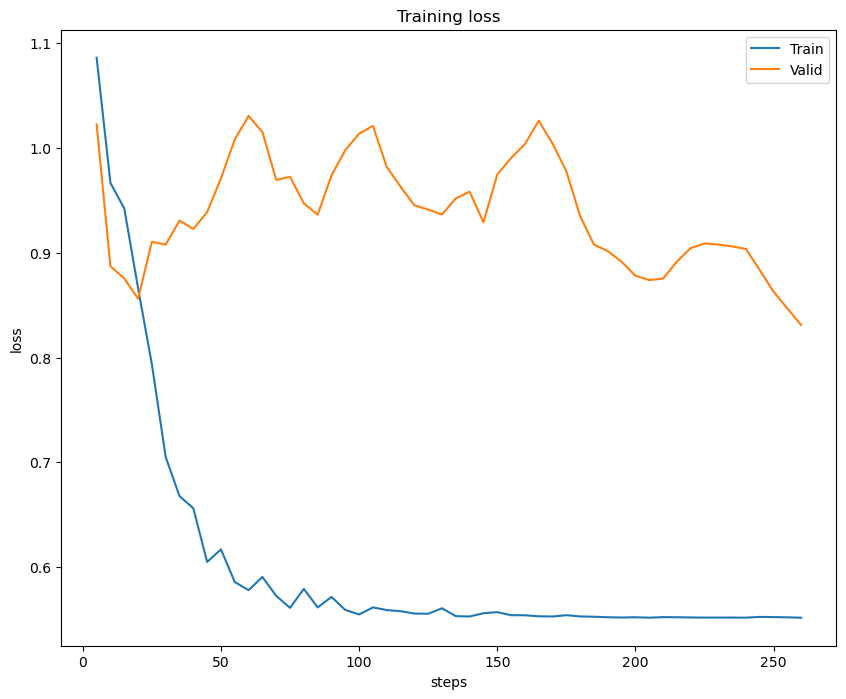

In [ ]:
train_loss, valid_loss, steps = load_metrics('./data/bi_lstm_metrics.pt')
create_loss_plot(train_loss, valid_loss, steps)

2023-01-25 13:21:14,721 : model (148) - INFO - Loaded model from: ./data/bi_lstm.pt
2023-01-25 13:21:14,759 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.61      0.50      0.55        28
           1       0.74      0.91      0.81        65
           2       0.74      0.48      0.58        29

    accuracy                           0.71       122
   macro avg       0.69      0.63      0.65       122
weighted avg       0.71      0.71      0.70       122



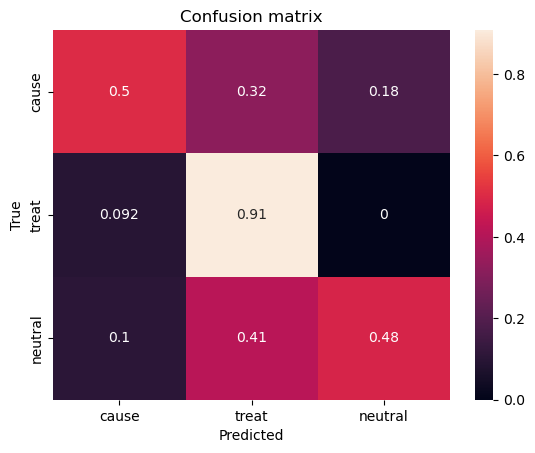

In [ ]:
# load and evaluate best model
best_model = LSTM(588).to(device)

best_model.load('./data/bi_lstm.pt', device)
evaluate_lstm(best_model, test_loader, device=device)

# CrowdTruth dataset 

**One of the major missclassification problems for our previous models is that many words from the test dataset never occur in the train dataset because of the small sample size of the whole dataset. Therefore we wanted to test if we could improve performance by training the LSTM model on the Crowdtruth dataset, which has similar structure and is much larger, and afterwards transfer the knowledge of this model by testing it on the FoodDisease dataset.**

In [ ]:
from tuwnlpie.milestone3.utils import load_metrics, create_loss_plot, get_loaders_crowdtruth, prepare_dataset_crowdtruth
from tuwnlpie.milestone3.model import LSTM

In [ ]:
# run this to prepare dataset for training with lstm and create train, valid and test csv files in data
prepare_dataset_crowdtruth()

In [ ]:
# loaders for groundtruth dataset, transformed into the format for torch usage
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size=32
train_loader_ct, valid_loader_ct, test_loader_ct, vocab_length_ct = get_loaders_crowdtruth(batch_size=batch_size, device=device,
                                train_name='train_ct_cause.csv',valid_name='valid_ct_cause.csv',test_name='test_ct_cause.csv')

## Testing LSTM Model with CrowdTruth dataset: binary cause label (is_cause true/false)

**Before we test the model on the FoodDisease dataset, we need to train and test the LSTM model on the CrowdTruth dataset.**

In [ ]:
model = LSTM(vocab_length=vocab_length_ct, dropout_rate=0.5,num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_lstm(model=model, optimizer=optimizer, num_epochs=10, train_loader=train_loader_ct, valid_loader=valid_loader_ct, 
           out_name= 'crowdtruth_cause_lstm',device=device)

2023-01-25 13:38:59,201 : train (123) - INFO - Epoch [1/10], Step [5/400], Train Loss: 0.665, Valid Loss: 0.642
2023-01-25 13:38:59,208 : model (141) - INFO - Saved model to: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:38:59,209 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_cause_lstm_metrics.pt
2023-01-25 13:38:59,453 : train (123) - INFO - Epoch [1/10], Step [10/800], Train Loss: 0.635, Valid Loss: 0.625
2023-01-25 13:38:59,460 : model (141) - INFO - Saved model to: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:38:59,461 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_cause_lstm_metrics.pt
2023-01-25 13:38:59,701 : train (123) - INFO - Epoch [1/10], Step [15/1200], Train Loss: 0.609, Valid Loss: 0.608
2023-01-25 13:38:59,707 : model (141) - INFO - Saved model to: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:38:59,708 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_cause_lstm_metrics.pt
2023-01-25 13:38:59,958 : train (123) - INFO - Epoch [1/10], Ste

2023-01-25 13:39:14,457 : train (123) - INFO - Epoch [4/10], Step [260/20800], Train Loss: 0.361, Valid Loss: 0.536
2023-01-25 13:39:14,463 : model (141) - INFO - Saved model to: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:39:14,465 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_cause_lstm_metrics.pt
2023-01-25 13:39:14,721 : train (123) - INFO - Epoch [4/10], Step [265/21200], Train Loss: 0.340, Valid Loss: 0.534
2023-01-25 13:39:14,727 : model (141) - INFO - Saved model to: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:39:14,728 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_cause_lstm_metrics.pt
2023-01-25 13:39:14,986 : train (123) - INFO - Epoch [4/10], Step [270/21600], Train Loss: 0.367, Valid Loss: 0.532
2023-01-25 13:39:14,992 : model (141) - INFO - Saved model to: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:39:14,994 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_cause_lstm_metrics.pt
2023-01-25 13:39:15,257 : train (123) - INFO - Epoch [4

2023-01-25 13:39:32,501 : train (123) - INFO - Epoch [7/10], Step [555/44400], Train Loss: 0.357, Valid Loss: 0.536
2023-01-25 13:39:33,239 : train (123) - INFO - Epoch [7/10], Step [560/44800], Train Loss: 0.386, Valid Loss: 0.537
2023-01-25 13:39:33,469 : train (123) - INFO - Epoch [8/10], Step [565/45200], Train Loss: 0.328, Valid Loss: 0.537
2023-01-25 13:39:33,701 : train (123) - INFO - Epoch [8/10], Step [570/45600], Train Loss: 0.327, Valid Loss: 0.538
2023-01-25 13:39:33,939 : train (123) - INFO - Epoch [8/10], Step [575/46000], Train Loss: 0.338, Valid Loss: 0.536
2023-01-25 13:39:34,189 : train (123) - INFO - Epoch [8/10], Step [580/46400], Train Loss: 0.328, Valid Loss: 0.535
2023-01-25 13:39:34,437 : train (123) - INFO - Epoch [8/10], Step [585/46800], Train Loss: 0.324, Valid Loss: 0.536
2023-01-25 13:39:34,687 : train (123) - INFO - Epoch [8/10], Step [590/47200], Train Loss: 0.328, Valid Loss: 0.536
2023-01-25 13:39:34,950 : train (123) - INFO - Epoch [8/10], Step [595/4

In [ ]:
model

LSTM(
  (embedding): Embedding(3068, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (drop): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=128, out_features=2, bias=True)
  (classifier): Softmax(dim=1)
)

2023-01-25 13:41:05,447 : model (148) - INFO - Loaded model from: ./data/crowdtruth_cause_lstm.pt
2023-01-25 13:41:05,632 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       494
           1       0.76      0.66      0.71       304

    accuracy                           0.79       798
   macro avg       0.78      0.77      0.77       798
weighted avg       0.79      0.79      0.79       798



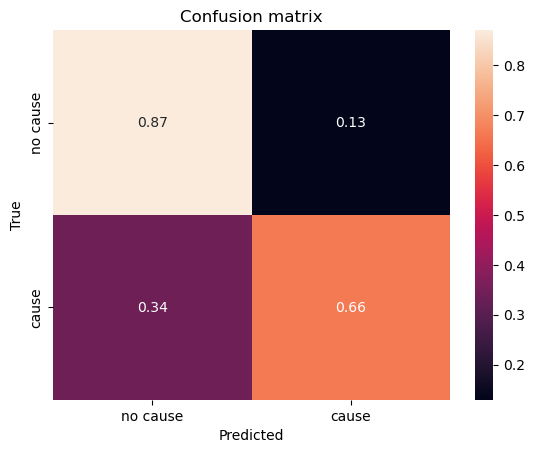

In [ ]:
# load and evaluate best model
best_model_ct = LSTM(3068,num_classes=2).to(device)

best_model_ct.load('./data/crowdtruth_cause_lstm.pt', device)
evaluate_lstm(best_model_ct, test_loader_ct, device=device,class_labels=['no cause', 'cause'])

## Testing LSTM Model with CrowdTruth dataset: binary treat label (is_treat true/false)

In [ ]:
# loaders for groundtruth dataset, transformed into the format for torch usage
train_loader_ct2, valid_loader_ct2, test_loader_ct2, vocab_length_ct2 = get_loaders_crowdtruth(batch_size=batch_size, device=device,
                                train_name='train_ct_treat.csv',valid_name='valid_ct_treat.csv',test_name='test_ct_treat.csv')

In [ ]:
model = LSTM(vocab_length=vocab_length_ct2, dropout_rate=0.5,num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_lstm(model=model, optimizer=optimizer, num_epochs=10, train_loader=train_loader_ct2, valid_loader=valid_loader_ct2, 
           out_name= 'crowdtruth_treat_lstm',device=device)

2023-01-25 13:42:48,870 : train (123) - INFO - Epoch [1/10], Step [5/400], Train Loss: 0.680, Valid Loss: 0.659
2023-01-25 13:42:48,877 : model (141) - INFO - Saved model to: ./data/crowdtruth_treat_lstm.pt
2023-01-25 13:42:48,878 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_treat_lstm_metrics.pt
2023-01-25 13:42:49,113 : train (123) - INFO - Epoch [1/10], Step [10/800], Train Loss: 0.658, Valid Loss: 0.628
2023-01-25 13:42:49,120 : model (141) - INFO - Saved model to: ./data/crowdtruth_treat_lstm.pt
2023-01-25 13:42:49,121 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_treat_lstm_metrics.pt
2023-01-25 13:42:49,374 : train (123) - INFO - Epoch [1/10], Step [15/1200], Train Loss: 0.595, Valid Loss: 0.608
2023-01-25 13:42:49,380 : model (141) - INFO - Saved model to: ./data/crowdtruth_treat_lstm.pt
2023-01-25 13:42:49,381 : utils (306) - INFO - Metrics saved to ./data/crowdtruth_treat_lstm_metrics.pt
2023-01-25 13:42:49,626 : train (123) - INFO - Epoch [1/10], Ste

2023-01-25 13:43:02,006 : train (123) - INFO - Epoch [3/10], Step [225/18000], Train Loss: 0.337, Valid Loss: 0.482
2023-01-25 13:43:02,320 : train (123) - INFO - Epoch [3/10], Step [230/18400], Train Loss: 0.348, Valid Loss: 0.477
2023-01-25 13:43:02,683 : train (123) - INFO - Epoch [3/10], Step [235/18800], Train Loss: 0.355, Valid Loss: 0.479
2023-01-25 13:43:03,445 : train (123) - INFO - Epoch [3/10], Step [240/19200], Train Loss: 0.400, Valid Loss: 0.478
2023-01-25 13:43:03,668 : train (123) - INFO - Epoch [4/10], Step [245/19600], Train Loss: 0.341, Valid Loss: 0.479
2023-01-25 13:43:03,904 : train (123) - INFO - Epoch [4/10], Step [250/20000], Train Loss: 0.336, Valid Loss: 0.480
2023-01-25 13:43:04,142 : train (123) - INFO - Epoch [4/10], Step [255/20400], Train Loss: 0.370, Valid Loss: 0.478
2023-01-25 13:43:04,382 : train (123) - INFO - Epoch [4/10], Step [260/20800], Train Loss: 0.355, Valid Loss: 0.476
2023-01-25 13:43:04,627 : train (123) - INFO - Epoch [4/10], Step [265/2

2023-01-25 13:43:20,645 : train (123) - INFO - Epoch [7/10], Step [530/42400], Train Loss: 0.328, Valid Loss: 0.469
2023-01-25 13:43:20,932 : train (123) - INFO - Epoch [7/10], Step [535/42800], Train Loss: 0.337, Valid Loss: 0.471
2023-01-25 13:43:21,230 : train (123) - INFO - Epoch [7/10], Step [540/43200], Train Loss: 0.339, Valid Loss: 0.475
2023-01-25 13:43:21,540 : train (123) - INFO - Epoch [7/10], Step [545/43600], Train Loss: 0.320, Valid Loss: 0.475
2023-01-25 13:43:21,867 : train (123) - INFO - Epoch [7/10], Step [550/44000], Train Loss: 0.333, Valid Loss: 0.473
2023-01-25 13:43:22,232 : train (123) - INFO - Epoch [7/10], Step [555/44400], Train Loss: 0.347, Valid Loss: 0.468
2023-01-25 13:43:22,997 : train (123) - INFO - Epoch [7/10], Step [560/44800], Train Loss: 0.375, Valid Loss: 0.463
2023-01-25 13:43:23,223 : train (123) - INFO - Epoch [8/10], Step [565/45200], Train Loss: 0.325, Valid Loss: 0.462
2023-01-25 13:43:23,457 : train (123) - INFO - Epoch [8/10], Step [570/4

In [ ]:
model

LSTM(
  (embedding): Embedding(3021, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (drop): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=128, out_features=2, bias=True)
  (classifier): Softmax(dim=1)
)

2023-01-25 13:44:09,566 : model (148) - INFO - Loaded model from: ./data/crowdtruth_treat_lstm.pt
2023-01-25 13:44:09,746 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       509
           1       0.83      0.80      0.82       288

    accuracy                           0.87       797
   macro avg       0.86      0.86      0.86       797
weighted avg       0.87      0.87      0.87       797



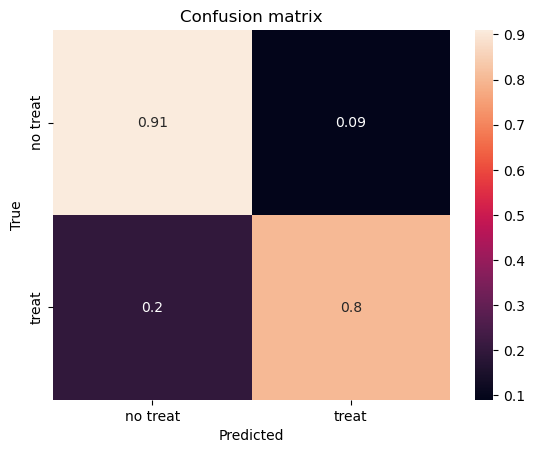

In [ ]:
# load and evaluate best model
best_model_ct2 = LSTM(3021,num_classes=2).to(device)

best_model_ct2.load('./data/crowdtruth_treat_lstm.pt', device)
evaluate_lstm(best_model_ct2, test_loader_ct2, device=device,class_labels=['no treat', 'treat'])

## Testing LSTM Model with binary FoodDisease dataset (using is_cause and is_treat)

In [ ]:
from tuwnlpie.milestone3.utils import prepare_dataset_fooddisease

In [ ]:
# run this to prepare dataset for training with lstm and create train, valid and test csv files in data
prepare_dataset_fooddisease()

In [ ]:
train_loader_fd, valid_loader_fd, test_loader_fd, vocab_length_fd = get_loaders_crowdtruth(batch_size=batch_size, device=device,
                                            train_name='train_fd_cause.csv',
                                            valid_name='valid_fd_cause.csv',
                                            test_name='test_fd_cause.csv')

In [ ]:
model = LSTM(vocab_length=vocab_length_fd, dropout_rate=0.5,num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_lstm(model=model, optimizer=optimizer, num_epochs=10, train_loader=train_loader_fd, valid_loader=valid_loader_fd, 
           out_name= 'fooddisease_binary_cause_lstm',device=device)

2023-01-25 13:49:06,526 : train (123) - INFO - Epoch [1/10], Step [5/65], Train Loss: 0.679, Valid Loss: 0.645
2023-01-25 13:49:06,530 : model (141) - INFO - Saved model to: ./data/fooddisease_binary_cause_lstm.pt
2023-01-25 13:49:06,531 : utils (306) - INFO - Metrics saved to ./data/fooddisease_binary_cause_lstm_metrics.pt
2023-01-25 13:49:06,681 : train (123) - INFO - Epoch [1/10], Step [10/130], Train Loss: 0.598, Valid Loss: 0.625
2023-01-25 13:49:06,684 : model (141) - INFO - Saved model to: ./data/fooddisease_binary_cause_lstm.pt
2023-01-25 13:49:06,685 : utils (306) - INFO - Metrics saved to ./data/fooddisease_binary_cause_lstm_metrics.pt
2023-01-25 13:49:06,844 : train (123) - INFO - Epoch [2/10], Step [15/195], Train Loss: 0.568, Valid Loss: 0.620
2023-01-25 13:49:06,848 : model (141) - INFO - Saved model to: ./data/fooddisease_binary_cause_lstm.pt
2023-01-25 13:49:06,849 : utils (306) - INFO - Metrics saved to ./data/fooddisease_binary_cause_lstm_metrics.pt
2023-01-25 13:49:0

In [ ]:
model

LSTM(
  (embedding): Embedding(558, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (drop): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=128, out_features=2, bias=True)
  (classifier): Softmax(dim=1)
)

2023-01-25 13:50:17,890 : model (148) - INFO - Loaded model from: ./data/fooddisease_binary_cause_lstm.pt
2023-01-25 13:50:17,926 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.79      1.00      0.88        94
           1       1.00      0.11      0.19        28

    accuracy                           0.80       122
   macro avg       0.89      0.55      0.54       122
weighted avg       0.84      0.80      0.72       122



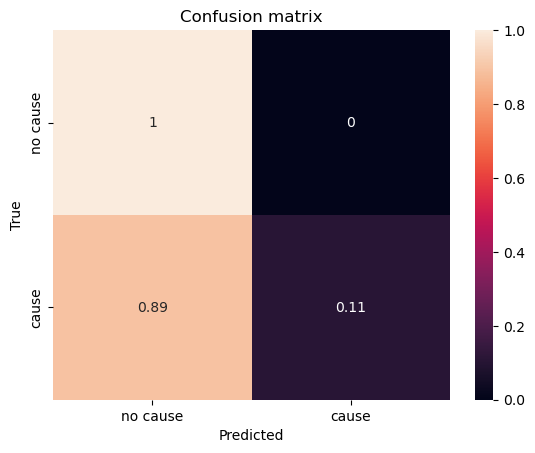

In [ ]:
# load and evaluate best model
best_model = LSTM(558,num_classes=2).to(device)

best_model.load('./data/fooddisease_binary_cause_lstm.pt', device)
evaluate_lstm(best_model, test_loader_fd, device=device,class_labels=['no cause', 'cause'])

In [ ]:
train_loader_fd2, valid_loader_fd2, test_loader_fd2, vocab_length_fd2 = get_loaders_crowdtruth(batch_size=batch_size, device=device,
                                            train_name='train_fd_treat.csv',
                                            valid_name='valid_fd_treat.csv',
                                            test_name='test_fd_treat.csv')

In [ ]:
model = LSTM(vocab_length=vocab_length_fd2, dropout_rate=0.5,num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_lstm(model=model, optimizer=optimizer, num_epochs=10, train_loader=train_loader_fd2, valid_loader=valid_loader_fd2,  
           out_name= 'fooddisease_binary_treat_lstm',device=device)

2023-01-25 13:51:16,724 : train (123) - INFO - Epoch [1/10], Step [5/65], Train Loss: 0.672, Valid Loss: 0.652
2023-01-25 13:51:16,727 : model (141) - INFO - Saved model to: ./data/fooddisease_binary_treat_lstm.pt
2023-01-25 13:51:16,728 : utils (306) - INFO - Metrics saved to ./data/fooddisease_binary_treat_lstm_metrics.pt
2023-01-25 13:51:16,883 : train (123) - INFO - Epoch [1/10], Step [10/130], Train Loss: 0.598, Valid Loss: 0.630
2023-01-25 13:51:16,887 : model (141) - INFO - Saved model to: ./data/fooddisease_binary_treat_lstm.pt
2023-01-25 13:51:16,888 : utils (306) - INFO - Metrics saved to ./data/fooddisease_binary_treat_lstm_metrics.pt
2023-01-25 13:51:17,040 : train (123) - INFO - Epoch [2/10], Step [15/195], Train Loss: 0.581, Valid Loss: 0.621
2023-01-25 13:51:17,044 : model (141) - INFO - Saved model to: ./data/fooddisease_binary_treat_lstm.pt
2023-01-25 13:51:17,045 : utils (306) - INFO - Metrics saved to ./data/fooddisease_binary_treat_lstm_metrics.pt
2023-01-25 13:51:1

In [ ]:
model

LSTM(
  (embedding): Embedding(558, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (drop): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=128, out_features=2, bias=True)
  (classifier): Softmax(dim=1)
)

2023-01-25 13:51:42,417 : model (148) - INFO - Loaded model from: ./data/fooddisease_binary_treat_lstm.pt
2023-01-25 13:51:42,454 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.81      0.97      0.88        94
           1       0.67      0.21      0.32        28

    accuracy                           0.80       122
   macro avg       0.74      0.59      0.60       122
weighted avg       0.77      0.80      0.75       122



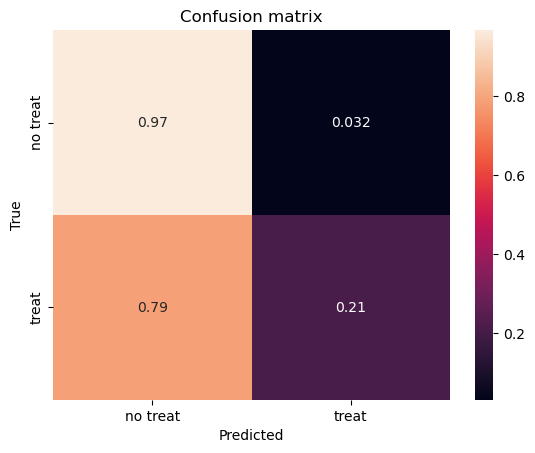

In [ ]:
# load and evaluate best model
best_model = LSTM(558,num_classes=2).to(device)

best_model.load('./data/fooddisease_binary_treat_lstm.pt', device)
evaluate_lstm(best_model, test_loader_fd2, device=device,class_labels=['no treat', 'treat'])

## LSTM model trained on Crowdtruth dataset, testing on FoodDisease dataset 

2023-01-25 13:50:48,858 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.79      0.72      0.75       297
           1       0.29      0.38      0.33        91

    accuracy                           0.64       388
   macro avg       0.54      0.55      0.54       388
weighted avg       0.68      0.64      0.65       388



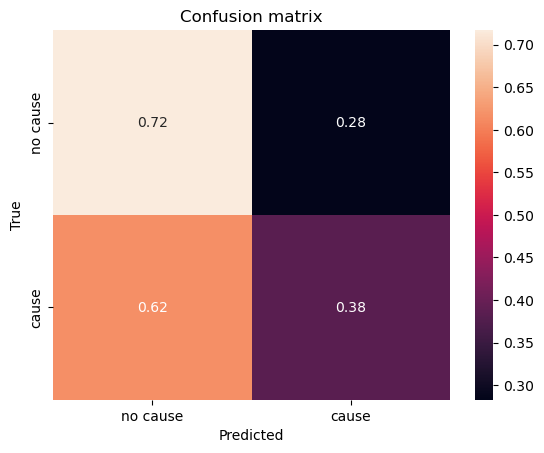

In [ ]:
evaluate_lstm(best_model_ct, train_loader_fd,device=device,class_labels=['no cause', 'cause']) #train_loader_fd because we technically could use the whole dataset from fooddisease here because the training and validation was done with ground_truth

2023-01-25 13:51:50,481 : evaluate (113) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.78      0.66      0.71       297
           1       0.27      0.41      0.32        91

    accuracy                           0.60       388
   macro avg       0.52      0.53      0.52       388
weighted avg       0.66      0.60      0.62       388



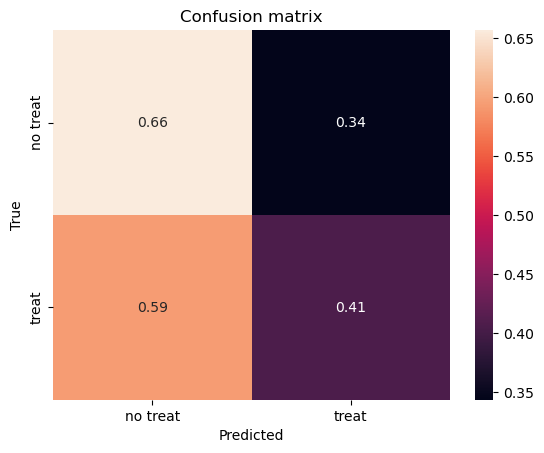

In [ ]:
evaluate_lstm(best_model_ct2, train_loader_fd2,device=device,class_labels=['no treat', 'treat']) #train_loader_fd because we technically could use the whole dataset from fooddisease here because the training and validation was done with ground_truth

## Discussion about CrowdTruth transfer learning approach
- The LSTM Model that performed best in Milestone 2 was used for training a model on the Crowd Truth dataset, but with the change that only binary labels were used with treat vs no treat and cause vs no cause and therefore 2 models were needed.
- The LSTM models on the CrowdTruth dataset performed pretty good with f-scores at 0.74 and 0.85 for the cause class and 0.90 and 0.82 for the treat class. In both cases the model performed better for the non occurency of the label (no cause and no treat) but that is expected as the dataset is highly unbalanced with around 2500 negative labels and 1400 positive labels for each of the treat and cause datasets.
- After training a model on the Crowdtruth dataset we also transformed the FoodDisease dataset into the same format with seperate datasets for treat and cause binary labels. 
- Training and testing the LSTM Model on those binary labels of the FoodDisease dataset provided results that were not worse than the LSTM model that was trained on all 3 classes with f-scores at 0.88 and 0.19 for the cause class and 0.88 and 0.33 for the treat class. The LSTM Model seemed to overfit and overpredicted the non occurence of treat and cause labels, as this was also the higher occuring label in these datasets.
- The transfer learning approach of using the models that were trained on the Crowdtruth dataset and testing them on the FoodDisease dataset did not show good peformance. Even though the F-Scores for cause and treat labels were better in these cases than on models that were trained and tested on the binary food disease datasets, the f-scores for the no-cause/no-treat labels were clearly worse and therefore also the macro averaged fscores were lower. 
- One of the reason why this transfer learning approach was not as good as hoped may be that the food disease dataset has very specific sentences in the dataset wheras the crowdtruth dataset has more sentences but only a small percentage of these sentences have any relation with food entities. 
- One way to improve this transfer learning approach would be to include a transformer like BioBERT to gain a much larger vocabulary and fine tune this transformer for both Crowdtruth and FoodDisease dataset. 

## Improving SGD Classifier from Milestone 1

Since the deep neuronal network models did not really show any improvement in comparison to a simple IF-IDF bag of words SGD classifier model from the 1st Milestone, we wanted to try to also improve the MS1 model. To do that, we decided to try to understand the difference between the misclassified and correctly classified sentences and which words are misleading the model.

In [ ]:
from tuwnlpie.milestone1.utils import (
    prepare_dataset,
    lemmatize_dataset,
    split_train_test_sklearn,
    train_sgd_classifier_with_grams,
    get_word_counts,
    plot_word_counts_by_target,
    plot_misclassified_sentences
)
from scripts.evaluate import eval_model

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
fulldata = prepare_dataset("./data/food_disease_dataset.csv")
fulldata_lemmatized = lemmatize_dataset(fulldata)
X_train, X_test, y_train, y_test = split_train_test_sklearn(fulldata_lemmatized)

#### Misclassified sentences analysis

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 1))
y_pred = svm_classifier.predict(t.transform(X_test))

In [ ]:
df_main = get_word_counts(X_train, y_train, X_test, y_test, y_pred, targets, sets)

largest-set
largest-target
missclassified


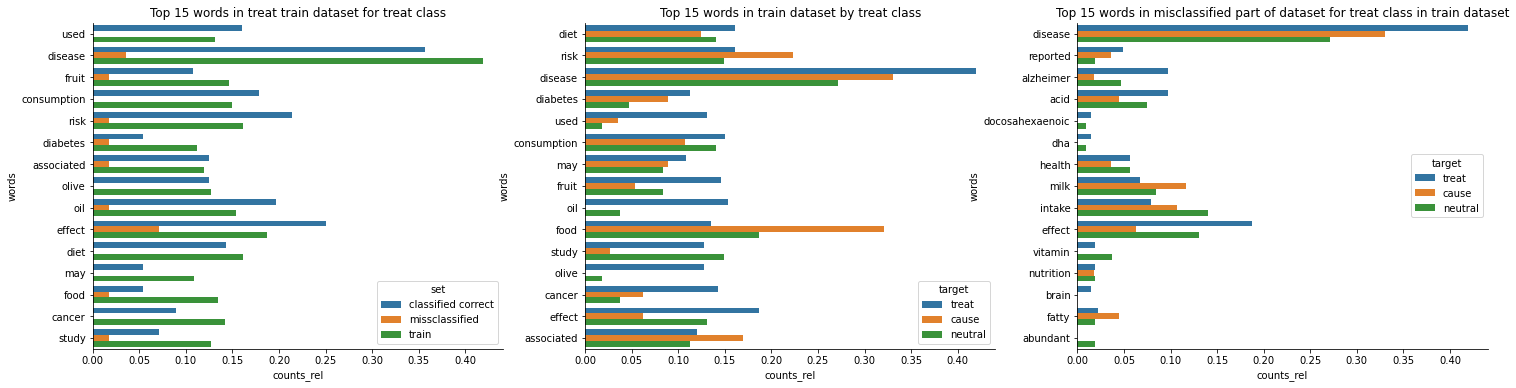

In [ ]:
plot_word_counts_by_target(df_main, 'treat')

Here we can see that the words which occure most often in treat train dataset but also in the misclassified sentences are pretty neutral, such as risk, effect, food, study. When we look at how these words are distributed across other classes, we can see that such words as risk or food has a much higher probability of occuring in the cause class, although they don't really point to the cause class without context. The most words from the list of the most common words in misclassified sentences are also very neutral without context: e.g., alzheimer, albeit having a higher occurence probability in the treat class, logically can also belong to cause or neutral classes. 

review summarizes mechanism effect dead sea salt hard water commercial baby cleanser oatmeal rice natural oil bathing additive treatment atopic dermatitis
black mulberry fruit traditionally used uyghur folk medicine prevention treatment cardiovascular disease southern xinjiang region china


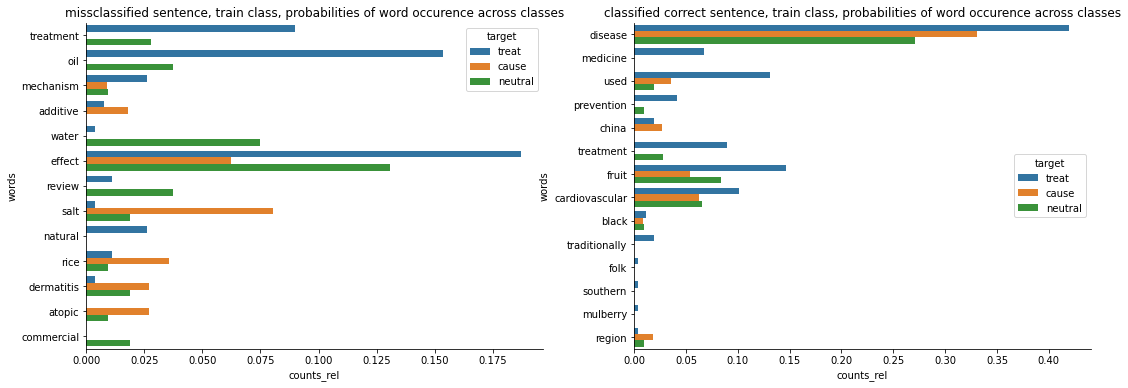

In [ ]:
sentence_mscl = 'review summarizes mechanism effect dead sea salt hard water commercial baby cleanser oatmeal rice natural oil bathing additive treatment atopic dermatitis'
sentence_normal = 'black mulberry fruit traditionally used uyghur folk medicine prevention treatment cardiovascular disease southern xinjiang region china'
plot_misclassified_sentences(df_main, sentence_mscl, sentence_normal, 'train')

In the plot above we can see two examples from sentences with treat relationship and the probability of occurence of their words in each class. We can see that in the misclassified sentences most words have a much higher occurence probability in other classes (cause and treat). Again, the neutrality trend continues: although such words as review, dermatitis, atopic are pretty neutral (e.g., a food can have a positive or a negative effect on dermatitis, the review can be about treatment as well as about sickness), they occure more often in other classes, which probably leads to model misclassifying the sentence. In the correctly classified sentence only 2 words have a higher occurence probability in other classes.

These trends (words being neutral without context, but having higher occurence probability in a specific class and words in a misclassified sentence being more common in other classes in the train set) also holds for cause and neutral classes:

largest-set
largest-target
missclassified


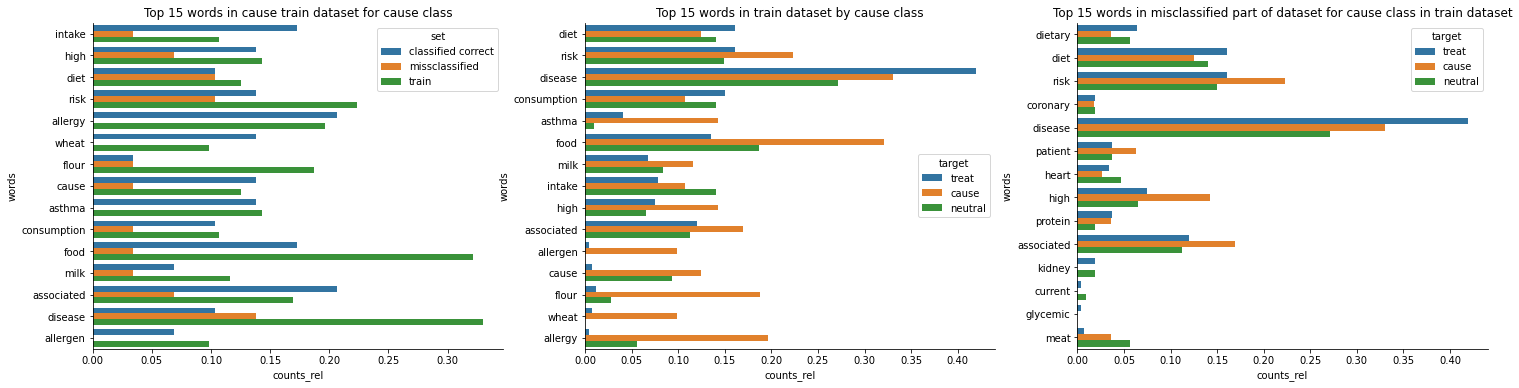

In [ ]:
plot_word_counts_by_target(df_main, 'cause')

excessive consumption red meat associated various disease including coronary heart disease cancer
based observation investigator believe long term intake high carbohydrate diet may increase risk nephrolithiasis possibly osteoporosisa


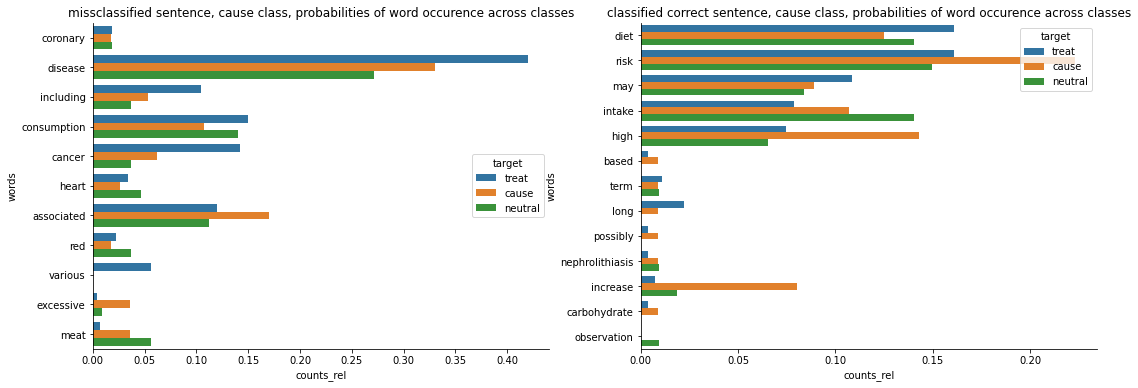

In [ ]:
sentence_mscl = 'excessive consumption red meat associated various disease including coronary heart disease cancer'
sentence_normal = 'based observation investigator believe long term intake high carbohydrate diet may increase risk nephrolithiasis possibly osteoporosisa'
plot_misclassified_sentences(df_main, sentence_mscl, sentence_normal, 'cause')

largest-set
largest-target
missclassified


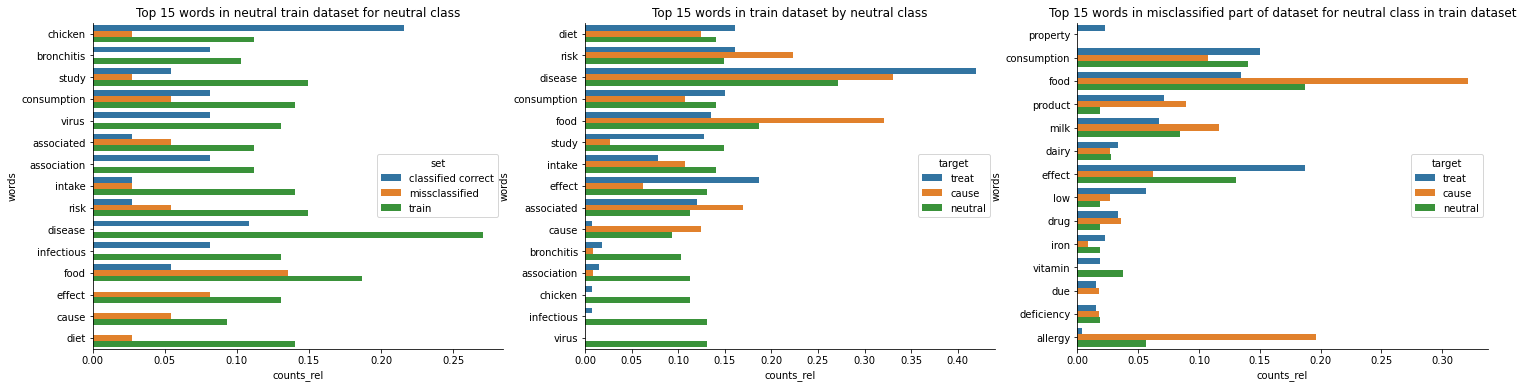

In [ ]:
plot_word_counts_by_target(df_main, 'neutral')

child cerebral palsy exhibit eating problem due effect anatomical functional structure involved eating function resulting malnutrition
report first case mycobacterium tuberculosis infection korean wild boar sus scrofa coreanus


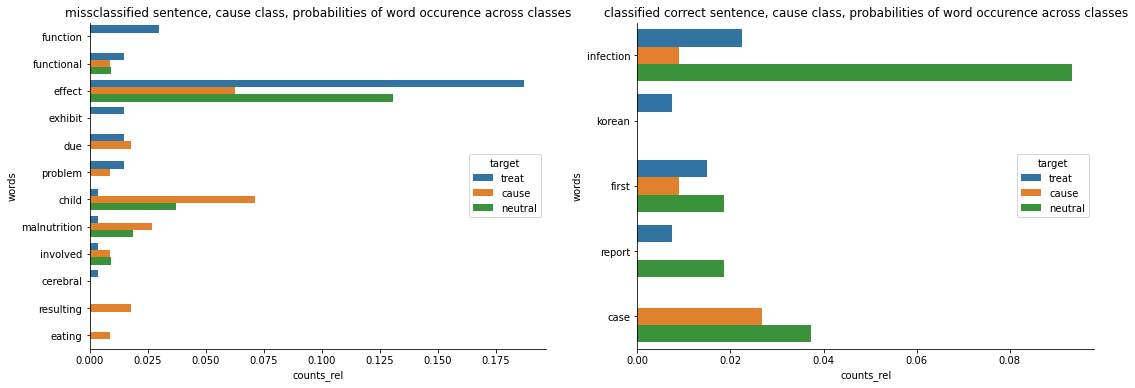

In [ ]:
sentence_mscl = 'child cerebral palsy exhibit eating problem due effect anatomical functional structure involved eating function resulting malnutrition'
sentence_normal = 'report first case mycobacterium tuberculosis infection korean wild boar sus scrofa coreanus'
plot_misclassified_sentences(df_main, sentence_mscl, sentence_normal, 'cause')

Because of the trends described earlier, we decided to try to use bigrams and trigrams as an input for the model additionaly to the big of words. We had hoped that additionally using bigrams and trigrams would help the model to differentiate between such cases as e.g. "positive effect" and "negative effect", "increased risk" or "decreased risk" etc.

#### Reference model

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.67741935 0.765625   0.77777778]
recall: [0.72413793 0.875      0.56756757]
f-score: [0.7        0.81666667 0.65625   ]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7459016393442623
recall: 0.7459016393442623
f-score: 0.7459016393442623

Model eval (macro)
precision: 0.7402740442054957
recall: 0.7222351662006834
f-score: 0.7243055555555555



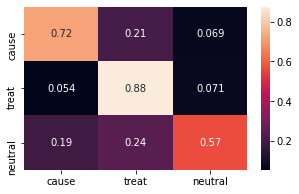

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 1))
eval_model(svm_classifier, t.transform(X_test), y_test)

#### Bigrams and trigrams for binary classification
When we only use treat and cause classes as targets for classification, additionally using bigrams as an input helps to increase the recall for cause class for 12%. Unfortunately we did not manage build a system which could differentiate between neutral and non-neutral sentence, so it is not possible to use this improved model in a two-step classification, where the first step would determine if a sentence a neutral or not, and the second wether the entities in the sentence has cause or treat relationship.

In [ ]:
X_train, X_test, y_train, y_test = split_train_test_sklearn(fulldata_lemmatized[(fulldata_lemmatized.target == 'treat') | (fulldata_lemmatized.target == 'cause')])

Model eval
precision: [0.89189189 0.89473684]
recall: [0.97058824 0.68      ]
f-score: [0.92957746 0.77272727]
number of occurences of each label (from ['treat' 'cause']): [68 25]



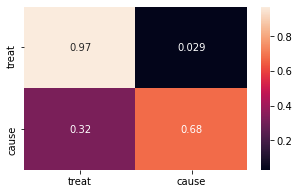

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 1))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Model eval
precision: [0.92857143 0.86956522]
recall: [0.95588235 0.8       ]
f-score: [0.94202899 0.83333333]
number of occurences of each label (from ['treat' 'cause']): [68 25]



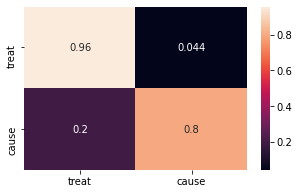

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 2))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Using bigrams and/or trigrams as an input additionally to the bag of words does not lead to significant improvement. We also tried using only bigrams and only trigrams, it also did not improve the performance.

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.7        0.71621622 0.88888889]
recall: [0.72413793 0.94642857 0.43243243]
f-score: [0.71186441 0.81538462 0.58181818]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7377049180327869
recall: 0.7377049180327869
f-score: 0.7377049180327869

Model eval (macro)
precision: 0.7683683683683684
recall: 0.7009996449651622
f-score: 0.7030224013274861



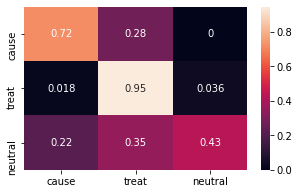

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 2))
eval_model(svm_classifier, t.transform(X_test), y_test)

#### Word window
In their paper the authors of the dataset propose to limit the classification only on words between the entities as well as 5 words before and after the first and last entities respectively. According to them this word window contains the most relevant information and helps to reduce the noise in the input. That is why we also try this approach, using as input bag of words, bigrams, trigrams and combinations of those. Unfortuntely, it also does not help to improve the performance, rather leads the model to overpreferring the treat class even more.

In [ ]:
fulldata = prepare_dataset("./data/food_disease_dataset_cut.csv")
fulldata_lemmatized = lemmatize_dataset(fulldata)
X_train, X_test, y_train, y_test = split_train_test_sklearn(fulldata_lemmatized)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.75       0.72222222 0.81818182]
recall: [0.72413793 0.92857143 0.48648649]
f-score: [0.73684211 0.8125     0.61016949]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7459016393442623
recall: 0.7459016393442623
f-score: 0.7459016393442623

Model eval (macro)
precision: 0.7634680134680135
recall: 0.7130652820307993
f-score: 0.7198371989295272



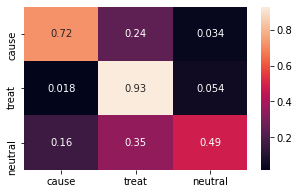

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 1))
eval_model(svm_classifier, t.transform(X_test), y_test)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.74074074 0.69620253 0.9375    ]
recall: [0.68965517 0.98214286 0.40540541]
f-score: [0.71428571 0.81481481 0.56603774]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7377049180327869
recall: 0.7377049180327869
f-score: 0.7377049180327869

Model eval (macro)
precision: 0.7914810907954367
recall: 0.6924011449873518
f-score: 0.6983794216498619



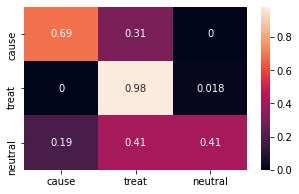

In [ ]:
t, svm_classifier = train_sgd_classifier_with_grams(X_train, y_train, (1, 2))
eval_model(svm_classifier, t.transform(X_test), y_test)

# Part of Speech Tagging

In [ ]:
from tuwnlpie.milestone2.utils import prepare_data_POS_for_LSTM_and_RNN_and_Binary, get_loader_binrary_POS

In [ ]:
prepare_data_POS_for_LSTM_and_RNN_and_Binary()

In [ ]:
training_sentences, training_labels, testing_sentences, testing_labels = get_loader_binrary_POS()

In [ ]:
vocab_size = 40000 ##means we will take 40,000 unique words to train the network
embedding_dim = 16  ##means each word will be represented by a 16-dimensional vector
max_length = 50  ##Max_length 120 represents the length of each review
trunc_type = 'post' ##sentences will be truncated at the end when a sentence is bigger than 120 words
oov_tok = '<OOV>' ##if the sentence is less than 120 words it will be padded to make 120 words.
padding_type = 'post' ##padding_type ‘post’ means padding will be applied at the end, not in the beginning.


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
num_epochs = 25
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/25
16/16 [==============================] - 1s 20ms/step - loss: 0.6864 - accuracy: 0.6543 - val_loss: 0.6689 - val_accuracy: 0.8361
Epoch 2/25
16/16 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.7490 - val_loss: 0.6494 - val_accuracy: 0.8361
Epoch 3/25
16/16 [==============================] - 0s 6ms/step - loss: 0.6545 - accuracy: 0.7490 - val_loss: 0.6287 - val_accuracy: 0.8361
Epoch 4/25
16/16 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.7490 - val_loss: 0.6059 - val_accuracy: 0.8361
Epoch 5/25
16/16 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.7490 - val_loss: 0.5820 - val_accuracy: 0.8361
Epoch 6/25
16/16 [==============================] - 0s 7ms/step - loss: 0.6059 - accuracy: 0.7490 - val_loss: 0.5575 - val_accuracy: 0.8361
Epoch 7/25
16/16 [==============================] - 0s 6ms/step - loss: 0.5902 - accuracy: 0.7490 - val_loss: 0.5337 - val_accuracy: 0.8361
Epoch 8/25
16/16 [=

# Results on binary POS tagging

## Just a small increase in the accuracy from 84% to 86%

# Binary classification LSTM cause-treat



Since we did not managed to find a possible solution to improve the LSTM model by using one of the suggested solutions of bi grams or trigrams, coupled with the fact that these last ones could not build a system which could differentiate between neutral and non-neutral sentence, we decided to test the predictions on binary classifiaction on the LSTM model. 

Below we will present the case of predicting the FoodDisease dataset on only two labels, cause vs treat and then neutral vs non neutral. Before feeding the data to the LSTM model, we have used the undersampling technique, which adapts the highest presented class to the number of the lowest represented class. 

In [ ]:
from tuwnlpie.milestone1.utils import split_train_dev_test,prepare_dataset,lemmatize_dataset,transform_to_dictionary,show_features,test_prediction_for_new_sentence,split_train_test_sklearn,undersampling_dataset
from scripts.evaluate import eval_model

In [ ]:
from tuwnlpie.milestone2.utils import TrainModel,EvaluatePerformance,get_loaders_lstm

In [ ]:
import torch
from tuwnlpie.milestone2.model import LSTM
from scripts.evaluate import evaluate_binary_lstm_1, evaluate_binary_lstm_2
from scripts.train import train_binary_lstm_1, validate_binary_lstm_1, train_binary_lstm_2, validate_binary_lstm_2
from tuwnlpie.milestone2.utils import load_metrics, create_loss_plot, get_loaders_lstm
from tuwnlpie.milestone3.utils prepare_dataset_binary_lstm_1, prepare_dataset_binary_lstm_2 
import spacy

In [ ]:
fulldata=prepare_dataset()

,sentence,target
0,"Interestingly, many Indian tribes use Bombax c...",treat
1,Ultra-processed food consumption has been asso...,cause
2,Salt has notoriously been blamed for causing a...,cause
3,in broiler chicken flocks when animal-based me...,neutral
4,"In short, this study demonstrated that SFP cou...",treat
...,...,...
603,"Thus, the inclusion of food sources of dietary...",treat
604,Glasshouse pathogenicity tests with 'Reed' avo...,neutral
605,Intake of beverages with excess free fructose ...,cause
606,"However, some evidence exists regarding a pote...",treat


In [ ]:
t=transform_to_dictionary(fulldata)

In [ ]:
train_docs, dev_docs, test_docs = split_train_dev_test(t)

In [ ]:
fulldata_lemmatized=lemmatize_dataset(fulldata)

In [ ]:
X_train, X_test, y_train, y_test = split_train_test_sklearn(fulldata_lemmatized)

In [ ]:
# loaders for dataset, transformed into the format for torch usage
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size=32
train_loader, valid_loader, test_loader, vocab_length = get_loaders_lstm(batch_size=batch_size, device=device)

In [ ]:
# uncomment this line to train new model
model = LSTM(vocab_length=vocab_length, dropout_rate=0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_binary_lstm_1(model=model, optimizer=optimizer, num_epochs=20, train_loader=train_loader, valid_loader=valid_loader, device=device)

Epoch [1/20], Step [5/65], Train Loss: 0.926, Valid Loss: 0.836
Epoch [1/20], Step [10/130], Train Loss: 0.798, Valid Loss: 0.847
Epoch [2/20], Step [15/195], Train Loss: 0.788, Valid Loss: 0.848
Epoch [2/20], Step [20/260], Train Loss: 0.787, Valid Loss: 0.846
Epoch [2/20], Step [25/325], Train Loss: 0.801, Valid Loss: 0.842
Epoch [3/20], Step [30/390], Train Loss: 0.781, Valid Loss: 0.822
Epoch [3/20], Step [35/455], Train Loss: 0.752, Valid Loss: 0.814
Epoch [4/20], Step [40/520], Train Loss: 0.757, Valid Loss: 0.790
Epoch [4/20], Step [45/585], Train Loss: 0.697, Valid Loss: 0.795
Epoch [4/20], Step [50/650], Train Loss: 0.726, Valid Loss: 0.761
Epoch [5/20], Step [55/715], Train Loss: 0.644, Valid Loss: 0.739
Epoch [5/20], Step [60/780], Train Loss: 0.697, Valid Loss: 0.774
Epoch [5/20], Step [65/845], Train Loss: 0.645, Valid Loss: 0.790
Epoch [6/20], Step [70/910], Train Loss: 0.617, Valid Loss: 0.794
Epoch [6/20], Step [75/975], Train Loss: 0.635, Valid Loss: 0.801
Epoch [7/20]

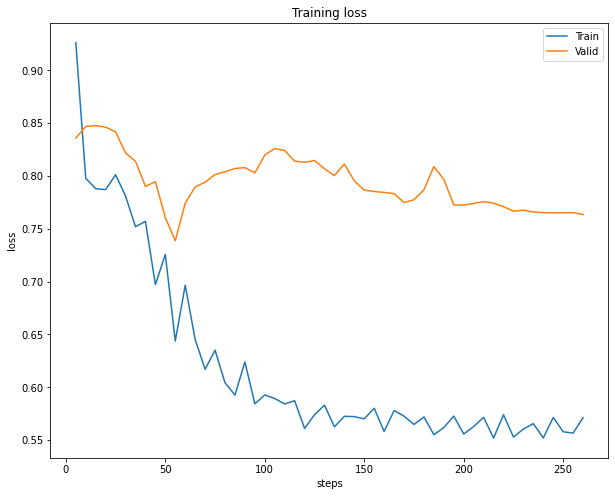

In [ ]:
train_loss, valid_loss, steps = load_metrics('./data/binary_LSTM_metrics_1.pt')
create_loss_plot(train_loss, valid_loss, steps)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.57      0.28      0.37        29

    accuracy                           0.78       122
   macro avg       0.69      0.61      0.62       122
weighted avg       0.75      0.78      0.75       122



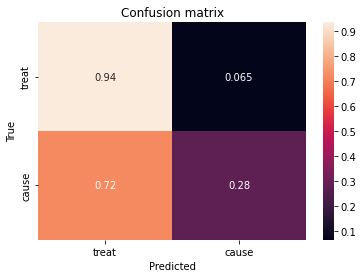

In [ ]:
# load and evaluate best model
best_model = LSTM(595).to(device)

best_model.load('./data/bi_lstm_binary_1.pt', device)
evaluate_binary_lstm_1(best_model, test_loader, device=device)

# Binary classification LSTM neutral-non neutral

In [ ]:
# uncomment this line to train new model
model = LSTM(vocab_length=vocab_length, dropout_rate=0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_binary_lstm_2(model=model, optimizer=optimizer, num_epochs=20, train_loader=train_loader, valid_loader=valid_loader, device=device)

Epoch [1/20], Step [5/65], Train Loss: 0.938, Valid Loss: 0.851
Epoch [1/20], Step [10/130], Train Loss: 0.801, Valid Loss: 0.848
Epoch [2/20], Step [15/195], Train Loss: 0.788, Valid Loss: 0.848
Epoch [2/20], Step [20/260], Train Loss: 0.789, Valid Loss: 0.848
Epoch [2/20], Step [25/325], Train Loss: 0.801, Valid Loss: 0.848
Epoch [3/20], Step [30/390], Train Loss: 0.801, Valid Loss: 0.848
Epoch [3/20], Step [35/455], Train Loss: 0.806, Valid Loss: 0.848
Epoch [4/20], Step [40/520], Train Loss: 0.769, Valid Loss: 0.848
Epoch [4/20], Step [45/585], Train Loss: 0.773, Valid Loss: 0.844
Epoch [4/20], Step [50/650], Train Loss: 0.798, Valid Loss: 0.827
Epoch [5/20], Step [55/715], Train Loss: 0.763, Valid Loss: 0.821
Epoch [5/20], Step [60/780], Train Loss: 0.735, Valid Loss: 0.813
Epoch [5/20], Step [65/845], Train Loss: 0.732, Valid Loss: 0.805
Epoch [6/20], Step [70/910], Train Loss: 0.669, Valid Loss: 0.806
Epoch [6/20], Step [75/975], Train Loss: 0.659, Valid Loss: 0.804
Epoch [7/20]

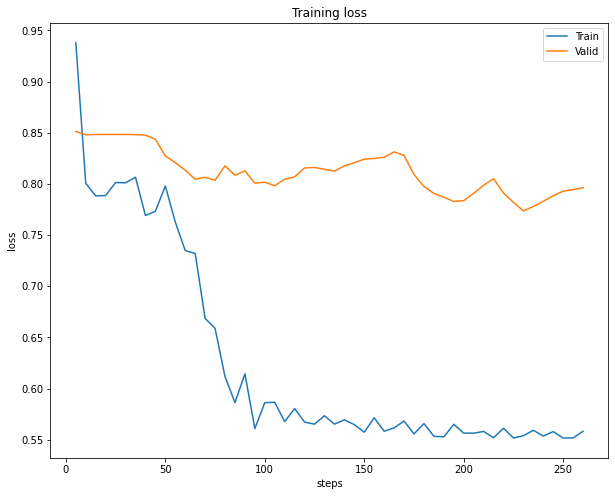

In [ ]:
train_loss, valid_loss, steps = load_metrics('./data/binary_LSTM_metrics_2.pt')
create_loss_plot(train_loss, valid_loss, steps)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        93
           1       0.80      0.28      0.41        29

    accuracy                           0.81       122
   macro avg       0.81      0.63      0.65       122
weighted avg       0.81      0.81      0.77       122



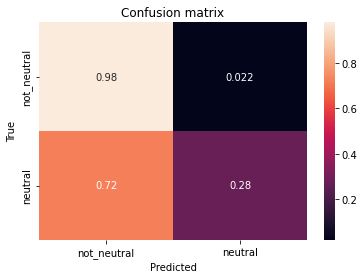

In [ ]:
# load and evaluate best model
best_model = LSTM(595).to(device)

best_model.load('./data/bi_lstm_binary_2.pt', device)
evaluate_binary_lstm_2(best_model, test_loader, device=device)